# Suggestion d'article au consommateur

## Contexte

Le client ne souhaite pas avoir des pop-up intrusif ou des spam newsletter pour leur connsommateur.
Il a cependant des emplacement qui suggèrent des articles à ses consommateurs.
Ces emplacements affichent les articles les plus vendus.

## Problématique

Au fil du temps, les produits les plus vendus sont peu dépassés par d'autres articles
car ils sont tout le temps mis en avant. Ce qui veut dire que les produits proposés
ne sont pas lié à l'actualité.

Par exemple : La playstation 2 est plus vendu que la playstation 5, donc la
playstation 2 serait mise en avant avec un tel système.

Le problème de proposé des produits les plus vendus, c'est de proposer des
produits que le consommateur a déjà acheté.

## Visualisation des données

In [1]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
	data_path = yaml.load(fp)
df_oder_item = pd.read_csv(data_path['olist_order_items_dataset'])
df_product = pd.read_csv(data_path['olist_products_dataset'])
df_orders = pd.read_csv(data_path['olist_orders_dataset'])
translation = pd.read_csv(data_path['product_category_name_translation'])
df = pd.merge(df_product, df_oder_item, on='product_id')
df = pd.merge(df, df_orders, on='order_id')
df = pd.merge(df, translation, on='product_category_name')

<ipython-input-1-8455f2e3cf9b>:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data_path = yaml.load(fp)


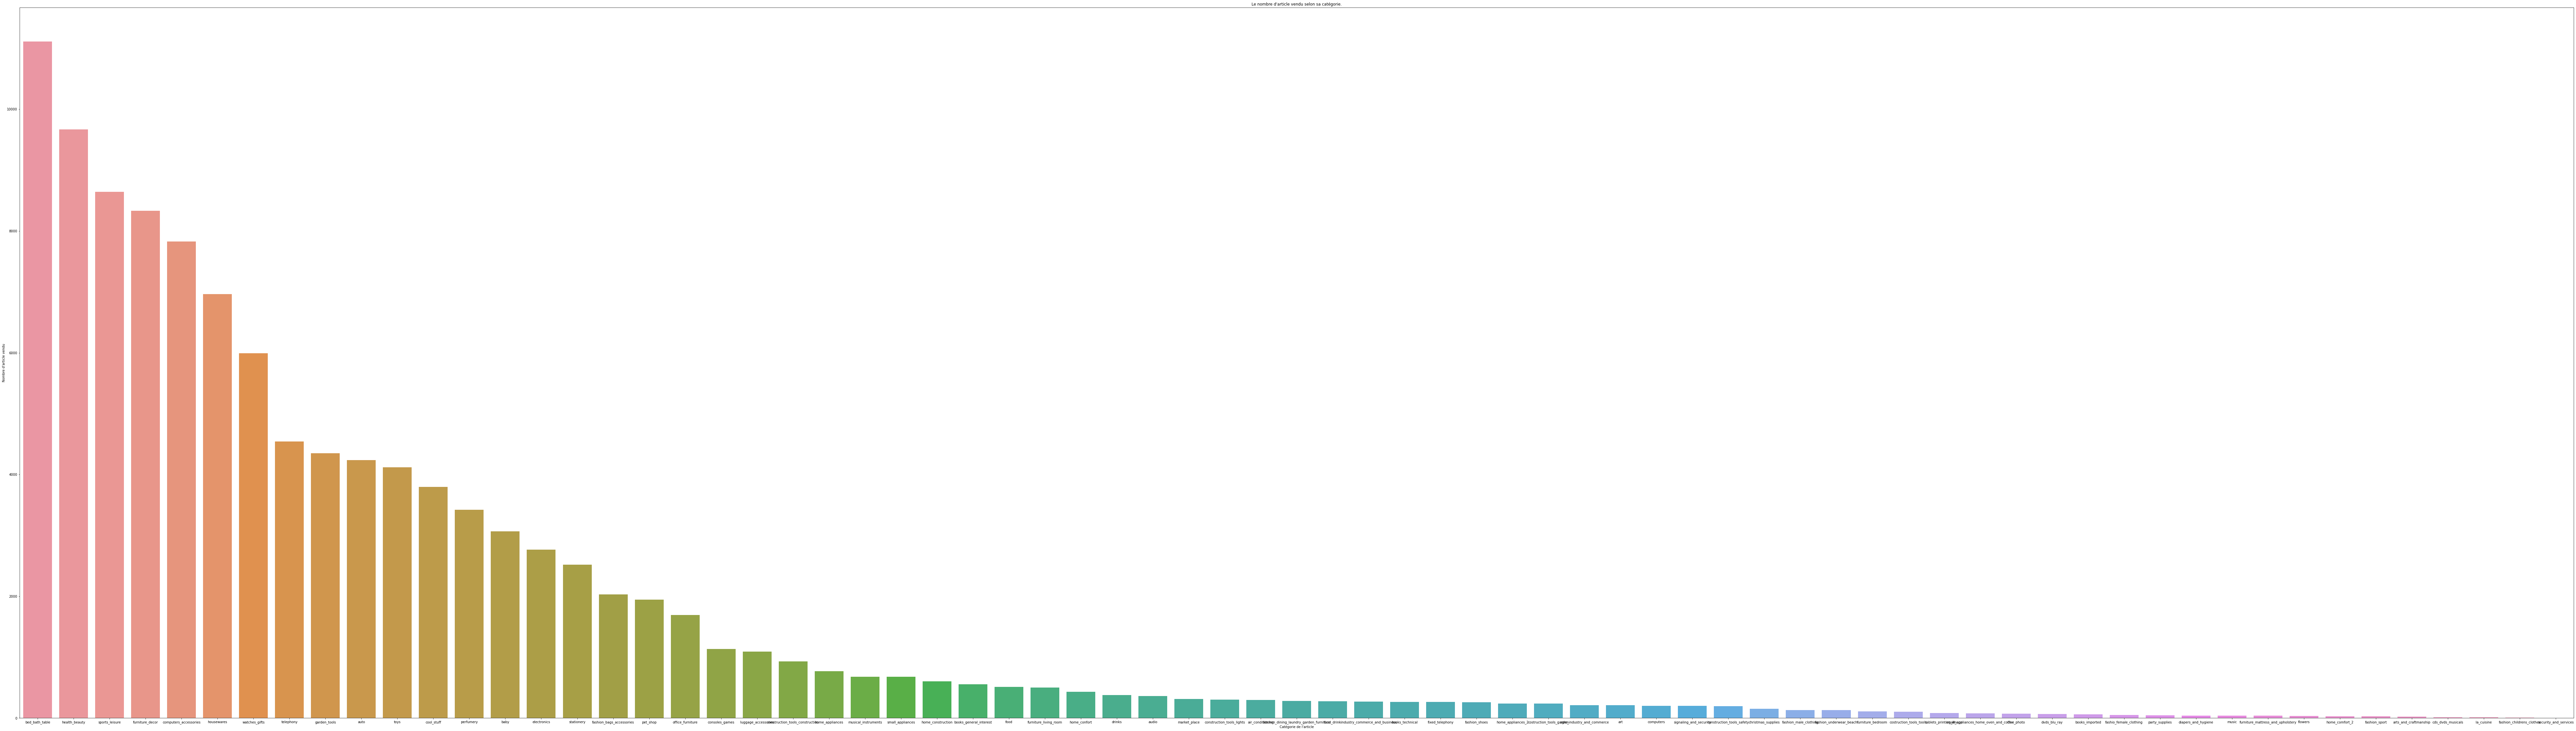

In [2]:
plt.figure(figsize=(140,40))
sns.countplot(data=df, x="product_category_name_english", order = df['product_category_name_english'].value_counts().index)
plt.ylabel("Nombre d'article vendu")
plt.xlabel("Catégorie de l'article")
plt.title("Le nombre d'article vendu selon sa catégorie.")
plt.savefig('../params/plot/suggestion/product_category.png')
plt.show()

In [3]:
category_count = df['product_category_name_english'].value_counts()
category_list = category_count[category_count>1].index.tolist()
df = df[df['product_category_name_english'].isin(category_list)]

In [107]:
category_list

['bed_bath_table',
 'health_beauty',
 'sports_leisure',
 'furniture_decor',
 'computers_accessories',
 'housewares',
 'watches_gifts',
 'telephony',
 'garden_tools',
 'auto',
 'toys',
 'cool_stuff',
 'perfumery',
 'baby',
 'electronics',
 'stationery',
 'fashion_bags_accessories',
 'pet_shop',
 'office_furniture',
 'consoles_games',
 'luggage_accessories',
 'construction_tools_construction',
 'home_appliances',
 'musical_instruments',
 'small_appliances',
 'home_construction',
 'books_general_interest',
 'food',
 'furniture_living_room',
 'home_confort',
 'drinks',
 'audio',
 'market_place',
 'construction_tools_lights',
 'air_conditioning',
 'kitchen_dining_laundry_garden_furniture',
 'food_drink',
 'industry_commerce_and_business',
 'books_technical',
 'fixed_telephony',
 'fashion_shoes',
 'costruction_tools_garden',
 'home_appliances_2',
 'agro_industry_and_commerce',
 'art',
 'computers',
 'signaling_and_security',
 'construction_tools_safety',
 'christmas_supplies',
 'fashion_male

In [112]:
plt.figure(figsize=(20,60))
sns.stripplot(data=df, y='customer_id', x='product_category_name_english')
plt.ylabel("Consommateurs")
plt.xlabel("Catégorie d'articles")
plt.title("Répartition des consommateurs selon les catégories d'articles")
plt.savefig('../params/plot/suggestion/customer_category.png')
plt.show()


KeyboardInterrupt: 

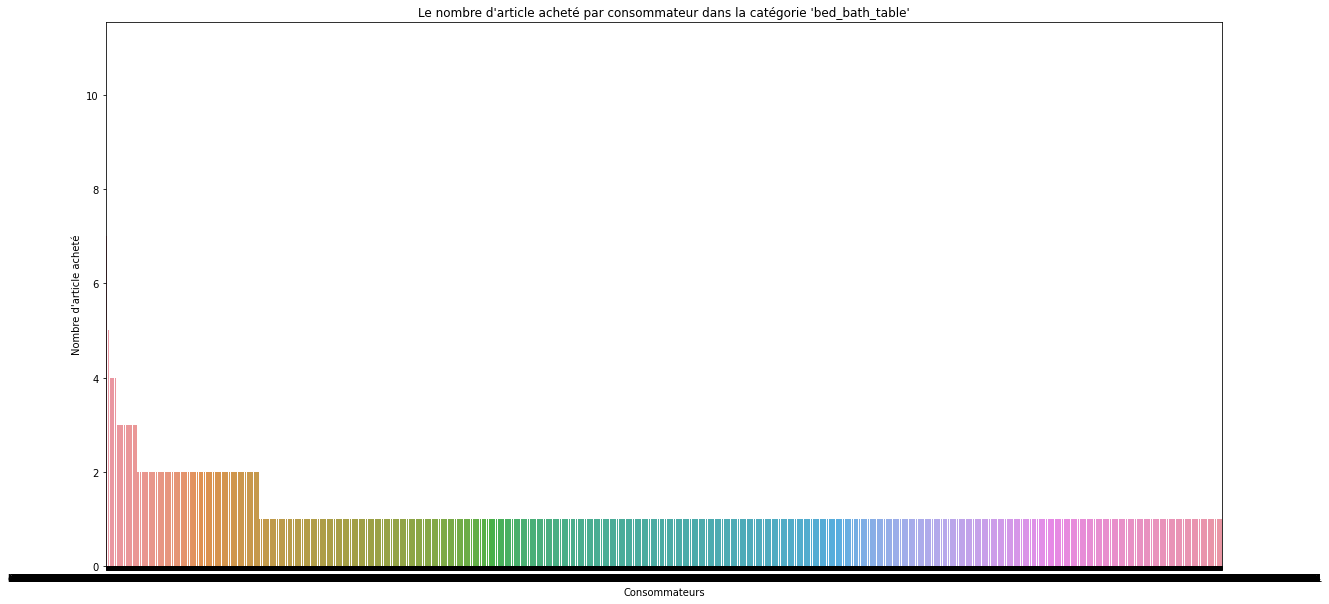

In [22]:
df_tmp = df[df['product_category_name_english'] == category_list[0]]
plt.figure(figsize=(20,10))
sns.countplot(data=df_tmp, x='customer_id', order=df_tmp['customer_id'].value_counts().index)
plt.ylabel("Nombre d'article acheté")
plt.xlabel("Consommateurs")
plt.title("Le nombre d'article acheté par consommateur dans la catégorie 'bed_bath_table'")
plt.savefig('../params/plot/suggestion/bed_bath_table_customer.png')
plt.show()

In [6]:
df_tmp = df[df['product_category_name_english'] == category_list[1]]
plt.figure(figsize=(20,10))
sns.countplot(data=df_tmp, x='customer_id', order=df_tmp['customer_id'].value_counts().index)
plt.ylabel("Nombre d'article acheté")
plt.xlabel("Consommateurs")
plt.title("Le nombre d'article acheté par consommateur dans la catégorie 'health_beauty'")
plt.savefig('../params/plot/suggestion/health_beauty_customer.png')
plt.show()

KeyboardInterrupt: 

In [ ]:
df_tmp = df[df['product_category_name_english'] == category_list[2]]
plt.figure(figsize=(20,10))
sns.countplot(data=df_tmp, x='customer_id', order=df_tmp['customer_id'].value_counts().index)
plt.ylabel("Nombre d'article acheté")
plt.xlabel("Consommateurs")
plt.title("Le nombre d'article acheté par consommateur dans la catégorie 'sports_leisure'")
plt.savefig('../params/plot/suggestion/sports_leisure_customer.png')
plt.show()

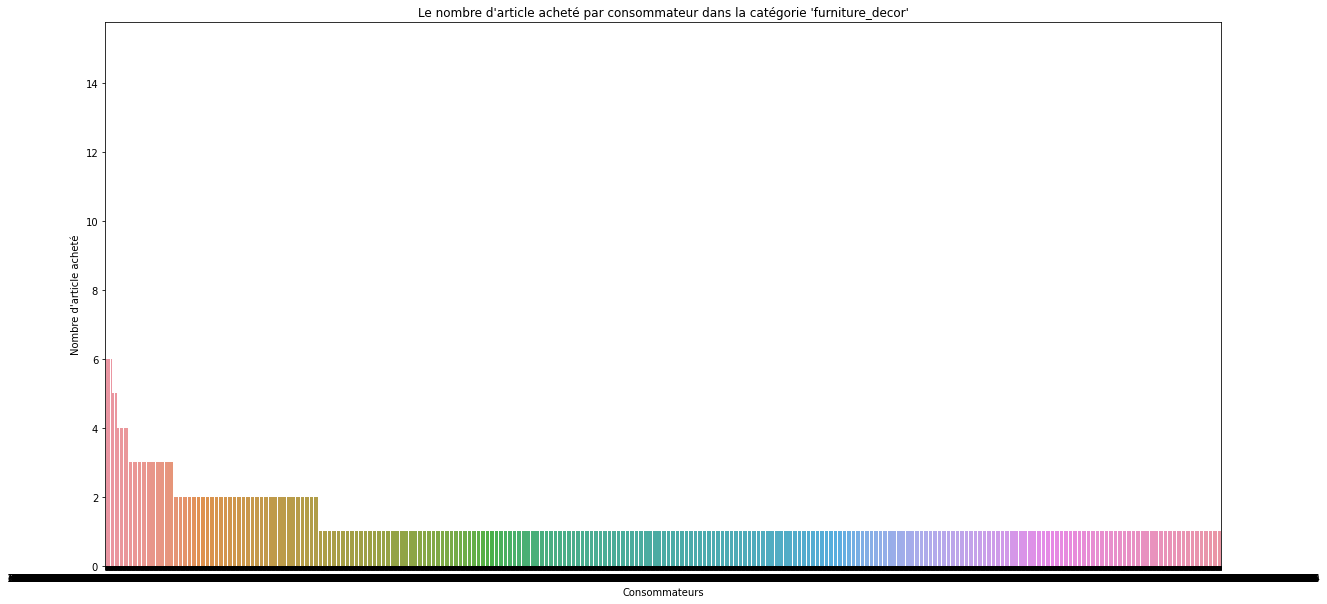

In [48]:
df_tmp = df[df['product_category_name_english'] == category_list[3]]
plt.figure(figsize=(20,10))
sns.countplot(data=df_tmp, x='customer_id', order=df_tmp['customer_id'].value_counts().index)
plt.ylabel("Nombre d'article acheté")
plt.xlabel("Consommateurs")
plt.title("Le nombre d'article acheté par consommateur dans la catégorie 'furniture_decor'")
plt.savefig('../params/plot/suggestion/furniture_decor_customer.png')
plt.show()

<AxesSubplot:title={'center':"Nombre d'article d'une commande"}>

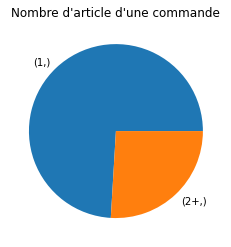

In [62]:

df_tmp = df[df['product_category_name_english'] == category_list[0]]
df_tmp
list = []
for i in df_tmp['product_photos_qty']:

    if(i<=1):
        if (i== 0):
            list.append('0')
        else :
            list.append('1')
    else:
        list.append('2+')
df2 = pd.DataFrame(list)
df2.value_counts().plot.pie(title="Nombre d'article d'une commande", label="")

<AxesSubplot:title={'center':"Nombre d'article d'une commande"}>

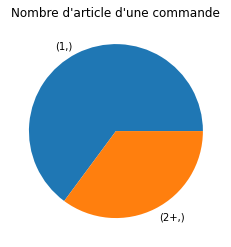

In [45]:
df_tmp = df[df['product_category_name_english'] == category_list[1]]

df_tmp
list = []
for i in df_tmp['product_photos_qty']:
    if (i== 0):
        list.append('0')
    if(i<=1):
        list.append('1')
    else:
        list.append('2+')
df3 = pd.DataFrame(list)

df3.value_counts().plot.pie(title="Nombre d'article d'une commande", label="")

<AxesSubplot:title={'center':"Nombre d'article d'une commande"}>

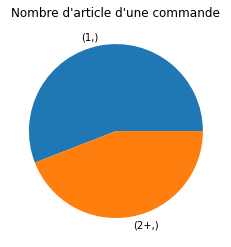

In [46]:
df_tmp = df[df['product_category_name_english'] == category_list[2]]
df_tmp
list = []
for i in df_tmp['product_photos_qty']:
    if (i== 0):
        list.append('0')
    if(i<=1):
        list.append('1')
    else:
        list.append('2+')
df4 = pd.DataFrame(list)

df4.value_counts().plot.pie(title="Nombre d'article d'une commande", label="")


<AxesSubplot:title={'center':"Nombre d'article d'une commande"}>

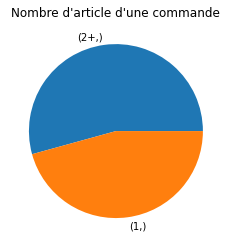

In [47]:
df_tmp = df[df['product_category_name_english'] == category_list[3]]
list = []
for i in df_tmp['product_photos_qty']:
    if (i== 0):
        list.append('0')
    if(i<=1):
        list.append('1')
    else:
        list.append('2+')
df5 = pd.DataFrame(list)

df5.value_counts().plot.pie(title="Nombre d'article d'une commande", label="")


<AxesSubplot:title={'center':"Nombre d'article d'une commande"}>

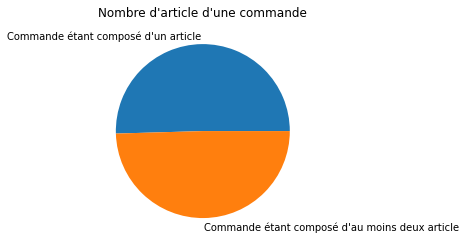

In [114]:
list = []
for i in category_list :
    df_tmp = df[df['product_category_name_english'] == i]

    for i in df_tmp['product_photos_qty']:
        if(i==1):
            list.append('1')
        else:
            list.append('2+')
df5 = pd.DataFrame(list)

df5.value_counts().plot.pie(title="Nombre d'article d'une commande", label="",labels=['Commande étant composé d\'un article','Commande étant composé d\'au moins deux article'])

In [109]:
df5.value_counts()


1     56019
2+    55004
dtype: int64

In [118]:
df5.value_counts()[1]*100/ (df5.value_counts()[0] + df5.value_counts()[1])

38.70497881355932

In [119]:
df5.value_counts()[0]*100/ (df5.value_counts()[0] + df5.value_counts()[1])

61.29502118644068

In [ ]:
x = 0
list = []
for i in pd.unique(df['customer_id']):
    for j in df.index:
        print(df.iloc[[j]]['customer_id'][0])
        #if(df.iloc[[j]]['customer_id'] == i):
          #  x += 1
    list.append(x)
    x=0
list


In [31]:
df.iloc[[0]]['customer_id'][0]

'f8a3e963a310aa58b60a5b1fed5bceb5'

## Analyse des graphiques

Les consommateurs ont tendance à acheter des produits d'une seule catégorie et au sein de ces catégories,
ils ont tendance à n'acheter qu'un seul article.

Il est essentiel que le consommateur a des suggestion ciblé afin de prendre plus d'article dans une catégorie.
Il faut donc avoir des suggestion qui dépendent de l'historique d'achat, de l'historique de recherche
et du panier afin de déterminer une catégorie importante pour le consommateur.
Et les articles de cette catégorie lui seront suggérés.

Par la suite, il faut voir si le prix des produit suggérés à une influence sur l'achat de nouveaux articles pour
 le consommateur afin de proposer des produits que le consommateur serait prêt à acheter. Et faire attention à ne
 pas enfermer le consommateur dans une seule catégorie.

